In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [13]:
gait = pd.read_csv("460_gait.csv")
gait = gait.dropna(axis=0, how='all')

In [14]:
gait.rename(columns={'x1':'stride length','x2':'gait speed[m/s]','x3':'age[years]','k':'k'}, inplace=True)
gait

,stride length,gait speed[m/s],age[years],k
0,0.5714,0.7965,18.0,1.0
1,0.5517,0.9190,18.0,1.0
2,0.6158,0.7900,16.0,1.0
3,0.7272,0.8433,22.0,0.0
4,0.8000,1.0083,23.0,0.0
5,0.7272,0.9183,25.0,0.0


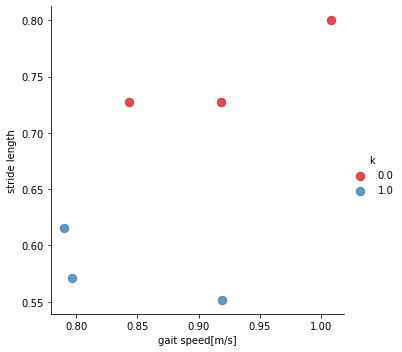

In [15]:
sns.lmplot('gait speed[m/s]','stride length',data=gait,hue='k',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.show()

In [16]:
gait_array = gait.to_numpy()
display(gait_array)

array([[ 0.5714,  0.7965, 18.    ,  1.    ],
       [ 0.5517,  0.919 , 18.    ,  1.    ],
       [ 0.6158,  0.79  , 16.    ,  1.    ],
       [ 0.7272,  0.8433, 22.    ,  0.    ],
       [ 0.8   ,  1.0083, 23.    ,  0.    ],
       [ 0.7272,  0.9183, 25.    ,  0.    ]])

In [17]:
# create X (features) y (response)
X=gait_array[:,:2]
X

array([[0.5714, 0.7965],
       [0.5517, 0.919 ],
       [0.6158, 0.79  ],
       [0.7272, 0.8433],
       [0.8   , 1.0083],
       [0.7272, 0.9183]])

In [18]:
# create y (response)

y=gait_array[:,3]
y

array([1., 1., 1., 0., 0., 0.])

In [19]:
# STEP 1: split X and y into training and testing sets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
x,y = shuffle(X,y)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=4)

In [20]:
from sklearn.tree import DecisionTreeClassifier;

tree = DecisionTreeClassifier(criterion    =  'entropy',
                              max_depth    =  3,
                              random_state =  0 );
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



[Text(167.4, 163.07999999999998, '[0.5714 0.7965] <= 0.671\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

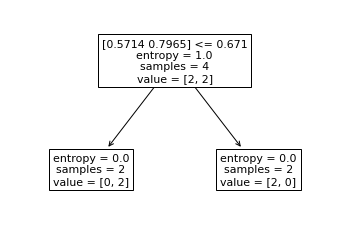

In [24]:
from sklearn.tree import plot_tree;

plot_tree(tree,
          feature_names = X,
          fontsize      = 11 )

In [25]:
from sklearn.metrics import accuracy_score;
y_pred_train = tree.predict(x_train);
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
y_pred_test = tree.predict(x_test);
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))

Train Set Accuracy :  1.0
Test Set Accuracy  :  1.0


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

clf_rf=RandomForestClassifier()
param_grid = {"n_estimators": np.arange(10,100,5),
              "min_samples_split": np.arange(2,100,2),
              "criterion": ["gini", "entropy"]
              }
grid_rf=GridSearchCV(clf_rf,param_grid,cv=2,scoring='accuracy')
print("Tuning Hyper-Parameters for accuracy")
grid_rf.fit(x_train,y_train)
print(grid_rf.best_params_)
print(np.round(grid_rf.best_score_,3))

Tuning Hyper-Parameters for accuracy
{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 25}
1.0


# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()

In [34]:
k_range=list(range(1,2))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=2,scoring='accuracy')
    k_scores.append(scores.mean())
print(np.round(k_scores,4))

[1.]


In [36]:
from sklearn.model_selection import GridSearchCV
k_range=list(range(1,3))
parameters=dict(n_neighbors=k_range)
clf_knn=GridSearchCV(knn,parameters,cv=2,scoring='accuracy')
print("Tuning Hyper-Parameters for accuracy" )
clf_knn.fit(x_train,y_train)
print(clf_knn.best_params_)
print(np.round(clf_knn.best_score_,5))

from sklearn.metrics import accuracy_score,classification_report
pred=clf_knn.predict(x_test)
print("Accuracy_score: ", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Tuning Hyper-Parameters for accuracy
{'n_neighbors': 1}
1.0
Accuracy_score:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# SVM 

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf=SVC()
Cs = [0.001, 0.01, 0.1, 1, 10,100,1000]
gammas = [0.001, 0.01, 0.1, 1,10,100,1000]
parameters=[{'kernel':['rbf'],'C':Cs,'gamma':gammas},{'kernel':['linear'],'C':Cs}]
clf_svm=GridSearchCV(clf,parameters,cv=2,scoring="accuracy")
print("Tuning Hyper-Parameters for accuracy")
clf_svm.fit(x_train,y_train)
print(clf_svm.best_params_)
print(np.round(clf_svm.best_score_,3))

predictions=clf_svm.predict(x_test)
print("Accuracy_score: ",accuracy_score(y_test,predictions))
#print(classification_report(y_test,predictions))

Tuning Hyper-Parameters for accuracy
{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
1.0
Accuracy_score:  1.0


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)
print("Random Forest Classifier accuracy : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Classifier accuracy : 100.00%


# LR

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
print("Logistic Regression accuracy : {:.2f}%".format(reg.score(x_test,y_test)*100))

Logistic Regression accuracy : 100.00%


# Naive Bayes

In [40]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print(" Naive Bayes accuracy : {:.2f}%".format(nb.score(x_test,y_test)*100))

 Naive Bayes accuracy : 100.00%
